In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 颜色空间

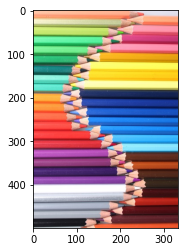

In [3]:
img = cv.imread('pic/pencils500x333.jpg')

show(img)

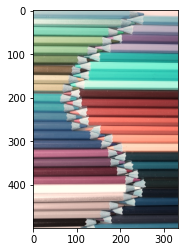

In [4]:
xyz = cv.cvtColor(img, cv.COLOR_BGR2XYZ)

show(xyz) #r,

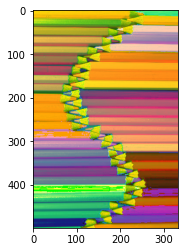

In [5]:
hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)

show(hls)

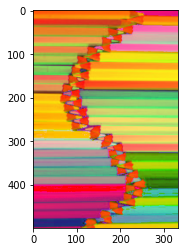

In [6]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

show(hsv)

## 2. 颜色直方图可视化

In [7]:
img = cv.imread('pic/pencils500x333.jpg')

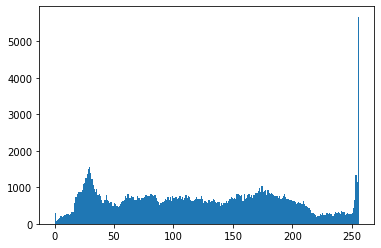

In [9]:
plt.hist(img[:, :, 0].ravel(), 256, [0, 256]) # b, g, r
plt.show()

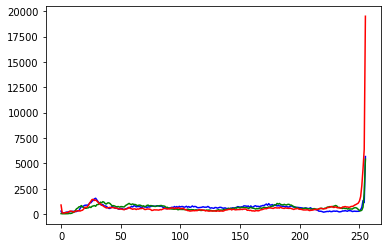

In [14]:
hist_b = cv.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv.calcHist([img], [2], None, [256], [0, 256])

plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.show()

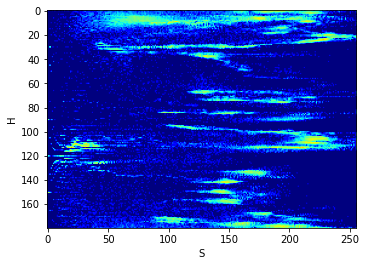

In [21]:
## 二维
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256]) # 0-->H, 1-->S
hist_log = np.log(1 + hist)

plt.imshow(hist_log, cmap='jet')
plt.xlabel('S')
plt.ylabel('H')
plt.show()

## 3. 实战：铅笔颜色选择

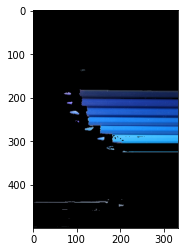

In [49]:
img = cv.imread('pic/pencils500x333.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower = np.array([100, 43, 46])
upper = np.array([124, 255, 255])

mask = cv.inRange(hsv, lower, upper)
mask3 = cv.merge([mask, mask, mask])

img_blue = img * (mask3 // 255)

show(img_blue)

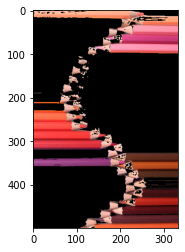

In [50]:
lower1 = np.array([0, 43, 46])
upper1 = np.array([10, 255, 255])
lower2 = np.array([156, 43, 46])
upper2 = np.array([180, 255, 255])

mask1 = cv.inRange(hsv, lower1, upper1)
mask2 = cv.inRange(hsv, lower2, upper2)

mask = cv.bitwise_or(mask1, mask2)
mask3 = cv.merge([mask, mask, mask])

img_red = img * (mask3 // 255)

show(img_red)

## 4. 实战：文字提取

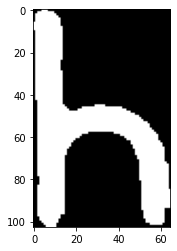

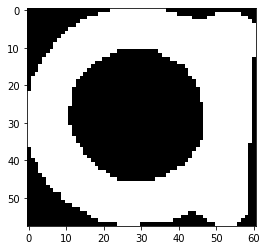

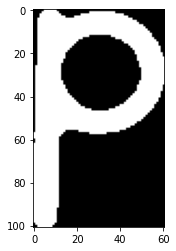

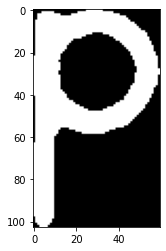

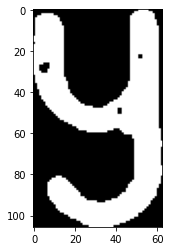

In [15]:
img = cv.imread('pic/word_happy.jpg')
img = cv.blur(img, (5,5))

d = 20
colors = np.array([ # b, g, r
    [2, 137, 194],
    [1, 217, 236],
    [16, 2, 173],
    [223, 90, 125],
    [48, 80, 135],
])

masks = [cv.inRange(img, c-d, c+d) for c in colors]
K = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
masks = [cv.morphologyEx(m, cv.MORPH_OPEN, K) for m in masks]

minArea = 2000
words = []

for m in masks:
    cnts, hiers = cv.findContours(m, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for cnt in cnts:
        if cv.contourArea(cnt) > minArea:
            x, y, w, h = cv.boundingRect(cnt)
            word = m[y:y+h, x:x+w]
            words.append(word)

for w in words:
    show(w)